In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
# from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import kagglehub
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

### Датасеты
Выбрать датасеты для кластеризации (2 шт), например на [kaggle](https://www.kaggle.com/datasets?&tags=13304-Clustering);\
    1.1. убрать из данных метки классов, если такие есть;\
    1.2. визуализировать данные;\
    1.3. определить "тип" кластеров;\
    1.4. сформировать гипотезу о количестве кластеров;

In [52]:
# Первый датасет Customer Segmentation
path = kagglehub.dataset_download("vjchoudhary7/customer-segmentation-tutorial-in-python")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\alext\.cache\kagglehub\datasets\vjchoudhary7\customer-segmentation-tutorial-in-python\versions\1


In [53]:
df = pd.read_csv(path+"\Mall_Customers.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [54]:
df = df.drop('CustomerID', axis=1)

In [55]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

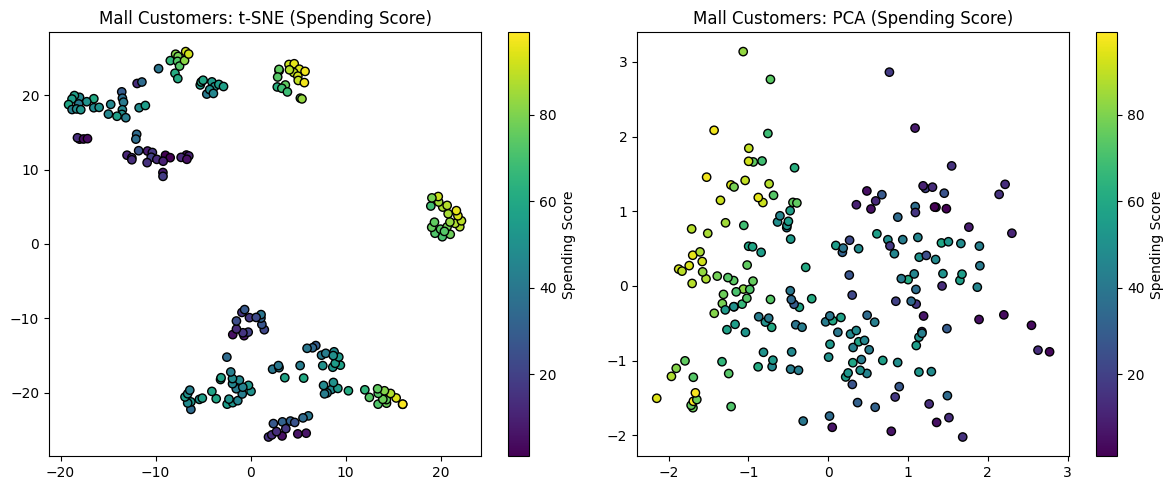

In [56]:
X_mall = df.values
scaler = StandardScaler()
X_mall_scaled = scaler.fit_transform(X_mall)

# Цвета на основе Spending Score
colors_mall = df['Spending Score (1-100)'].values

# Применение PCA и t-SNE
emb_tsne_mall = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=15).fit_transform(X_mall_scaled)
emb_pca_mall = PCA(n_components=2).fit_transform(X_mall_scaled)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sc1 = axes[0].scatter(emb_tsne_mall[:, 0], emb_tsne_mall[:, 1], c=colors_mall, edgecolor='k', cmap='viridis')
axes[0].set_title("Mall Customers: t-SNE (Spending Score)")
axes[1].scatter(emb_pca_mall[:, 0], emb_pca_mall[:, 1], c=colors_mall, edgecolor='k', cmap='viridis')
axes[1].set_title("Mall Customers: PCA (Spending Score)")
plt.colorbar(sc1, ax=axes[0], label='Spending Score')
plt.colorbar(sc1, ax=axes[1], label='Spending Score')
plt.tight_layout()

plt.show()

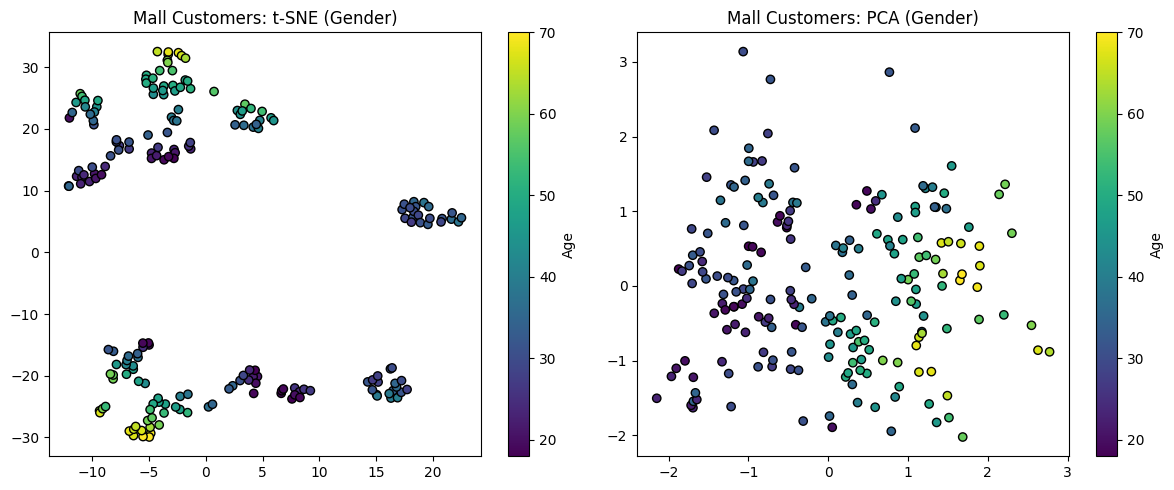

In [57]:
# Цвета на основе Spending Score
colors_mall = df['Age'].values

# Применение PCA и t-SNE
emb_tsne_mall = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=15).fit_transform(X_mall_scaled)
emb_pca_mall = PCA(n_components=2).fit_transform(X_mall_scaled)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sc1 = axes[0].scatter(emb_tsne_mall[:, 0], emb_tsne_mall[:, 1], c=colors_mall, edgecolor='k', cmap='viridis')
axes[0].set_title("Mall Customers: t-SNE (Gender)")
axes[1].scatter(emb_pca_mall[:, 0], emb_pca_mall[:, 1], c=colors_mall, edgecolor='k', cmap='viridis')
axes[1].set_title("Mall Customers: PCA (Gender)")
plt.colorbar(sc1, ax=axes[0], label='Age')
plt.colorbar(sc1, ax=axes[1], label='Age')
plt.tight_layout()

plt.show()

In [58]:
# Второй датасет UCI Wine
from sklearn.datasets import load_wine


data = load_wine()
X_wine = data.data  # Признаки

In [59]:
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]], shape=(178, 13)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [60]:
y_wine = data.target

In [61]:
scaler = StandardScaler()
X_wine_scaled = scaler.fit_transform(X_wine)

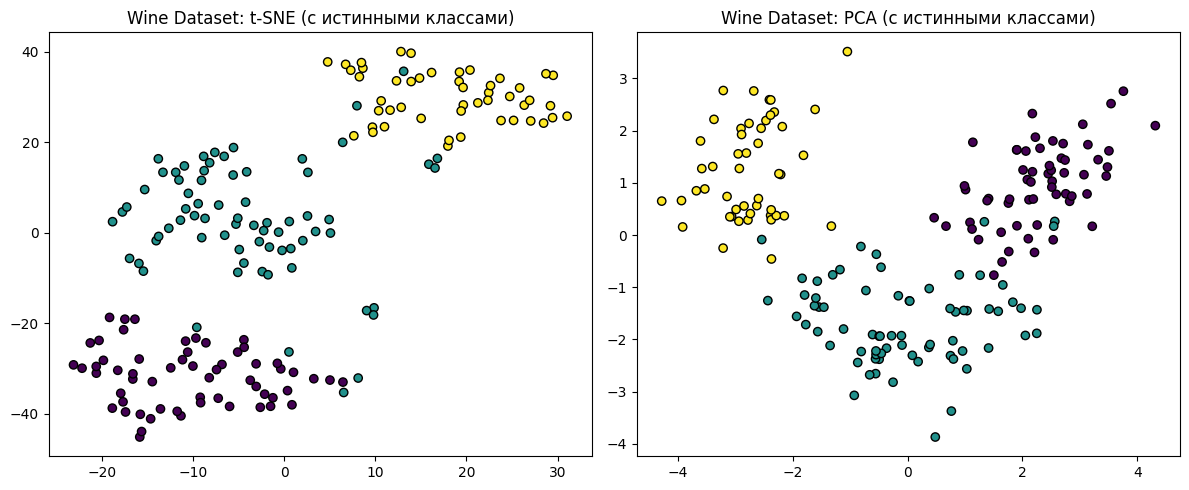

In [62]:
emb_tsne_wine = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=10).fit_transform(X_wine_scaled)
emb_pca_wine = PCA(n_components=2).fit_transform(X_wine_scaled)

# Построение графиков
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].scatter(emb_tsne_wine[:, 0], emb_tsne_wine[:, 1], c=y_wine, edgecolor='k', cmap='viridis')
axes[0].set_title("Wine Dataset: t-SNE (с истинными классами)")
axes[1].scatter(emb_pca_wine[:, 0], emb_pca_wine[:, 1], c=y_wine, edgecolor='k', cmap='viridis')
axes[1].set_title("Wine Dataset: PCA (с истинными классами)")
plt.tight_layout()

Количество кластеров wine - 3

### Иерархическая кластеризация

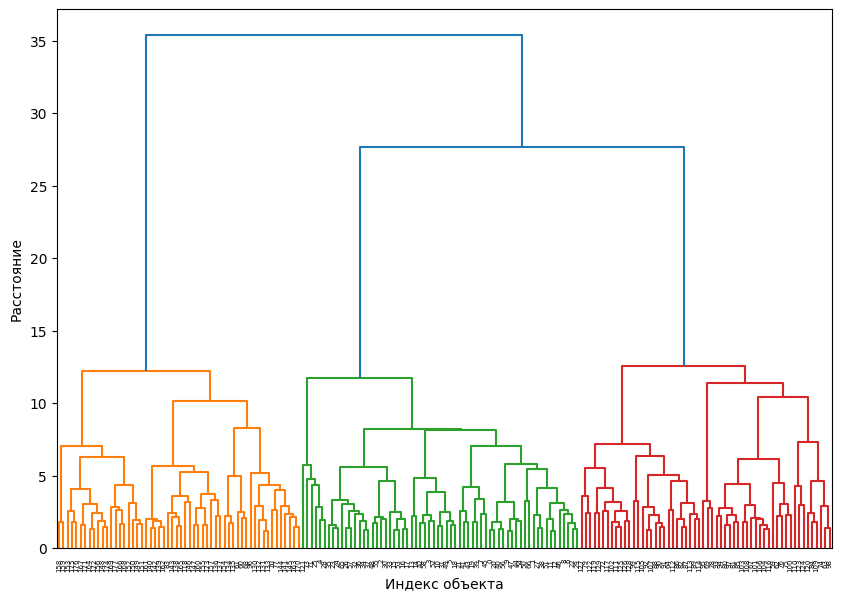

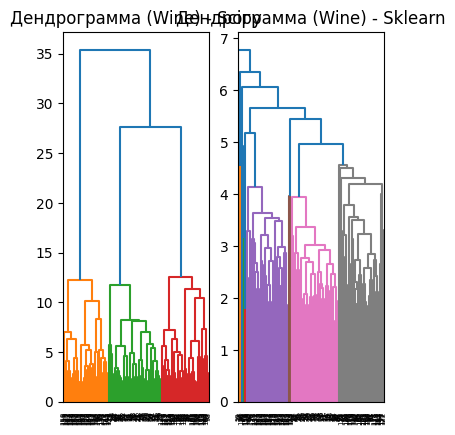

ZeroDivisionError: float division by zero

In [63]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

class HierarchicalClustering:
    def __init__(self, n_clusters=2, linkage='average'):
        self.n_clusters = n_clusters
        self.linkage = linkage
        self.labels_ = None
        self.linkage_matrix = None

    def _calculate_linkage(self, cluster1, cluster2, distances):
        if self.linkage == 'single':
            return np.min(distances[np.ix_(cluster1, cluster2)])
        elif self.linkage == 'complete':
            return np.max(distances[np.ix_(cluster1, cluster2)])
        elif self.linkage == 'average':
            return np.mean(distances[np.ix_(cluster1, cluster2)])
        else:
            raise ValueError("Unsupported linkage method")

    def fit(self, X):
        start_time = time.time()
        n_samples = X.shape[0]
        self.distances = squareform(pdist(X))
        clusters = [[i] for i in range(n_samples)]
        self.linkage_matrix = []

        current_cluster_id = n_samples  # Идентификатор для новых кластеров

        while len(clusters) > 1:
            min_dist = np.inf
            merge_indices = (0, 0)

            for i in range(len(clusters)):
                for j in range(i + 1, len(clusters)):
                    dist = self._calculate_linkage(clusters[i], clusters[j], self.distances)
                    if dist < min_dist:
                        min_dist = dist
                        merge_indices = (i, j)

            i, j = merge_indices
            new_cluster = clusters[i] + clusters[j]
            self.linkage_matrix.append([clusters[i][0], clusters[j][0], min_dist, len(new_cluster)])
            clusters[i] = new_cluster
            del clusters[j]

        self.labels_ = np.zeros(n_samples, dtype=int)
        for idx, cluster in enumerate(clusters):
            for point in cluster:
                self.labels_[point] = idx

        self.time_ = time.time() - start_time
        return self

    def plot_dendrogram(self, title):
        plt.figure(figsize=(10, 7))
        dendrogram(np.array(self.linkage_matrix))
        plt.title(title)
        plt.xlabel('Индекс объекта')
        plt.ylabel('Расстояние')
        plt.show()

def calculate_metrics(X, labels):
    intra = 0.0
    inter = 0.0
    unique_labels = np.unique(labels)
    n_clusters = len(unique_labels)

    for label in unique_labels:
        cluster_points = X[labels == label]
        if len(cluster_points) > 1:
            intra += np.mean(pdist(cluster_points))

    for i in range(n_clusters):
        for j in range(i + 1, n_clusters):
            inter += pairwise_distances(X[labels == i], X[labels == j]).mean()

    intra /= n_clusters
    inter /= (n_clusters * (n_clusters - 1)) / 2
    return intra, inter

# Эксперимент для одного датасета
def run_experiment(X, dataset_name):
    # Наша реализация
    start = time.time()
    hc_custom = HierarchicalClustering(n_clusters=3, linkage='average').fit(X)
    custom_time = time.time() - start

    # Эталонная реализация (scipy)
    start = time.time()
    Z = linkage(X, method='ward')
    plt.figure(figsize=(10, 7))
    dendrogram(Z)
    # plt.title(title)
    plt.xlabel('Индекс объекта')
    plt.ylabel('Расстояние')
    plt.show()
    scipy_time = time.time() - start

    # Эталонная реализация (sklearn)
    start = time.time()
    hc_sklearn = AgglomerativeClustering(n_clusters=3, linkage='average').fit(X)
    sklearn_time = time.time() - start

    # # Построение дендрограммы
    # plt.figure(figsize=(15, 5))
    # plt.subplot(1, 3, 1)
    # dendrogram(hc_custom.linkage_matrix)
    # plt.title(f'Дендрограмма ({dataset_name}) - Кастомная')

    plt.subplot(1, 3, 2)
    dendrogram(Z)
    plt.title(f'Дендрограмма ({dataset_name}) - Scipy')

    plt.subplot(1, 3, 3)
    dendrogram(linkage(X, method='average'))
    plt.title(f'Дендрограмма ({dataset_name}) - Sklearn')
    plt.show()

    # Расчет метрик
    intra_custom, inter_custom = calculate_metrics(X, hc_custom.labels_)
    intra_scipy, inter_scipy = calculate_metrics(X, "scipy")
    intra_sklearn, inter_sklearn = calculate_metrics(X, hc_sklearn.labels_)

    return {
        'Custom': (intra_custom, inter_custom, custom_time),
        'Scipy': (intra_scipy, inter_scipy, scipy_time),
        'Sklearn': (intra_sklearn, inter_sklearn, sklearn_time)
    }

# Запуск экспериментов

results_wine = run_experiment(X_wine_scaled, 'Wine')
results_mall = run_experiment(X_mall_scaled, 'Mall Customers')

# Визуализация результатов
def print_results(results, dataset_name):
    print(f"\nРезультаты для {dataset_name}:")
    print("Метод\t\tВнутрикластерное\tМежкластерное\tВремя")
    for method in ['Custom', 'Scipy', 'Sklearn']:
        intra, inter, t = results[method]
        print(f"{method}\t{intra:.4f}\t\t{inter:.4f}\t\t{t:.4f}")

print_results(results_wine, "Wine Dataset")
print_results(results_mall, "Mall Customers Dataset")

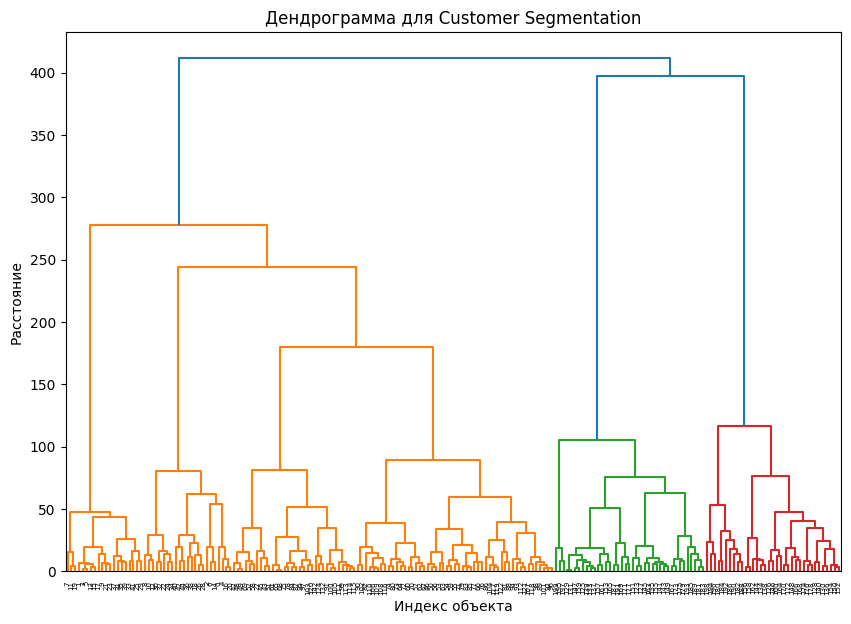

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_dendrogram(X, title):
    Z = linkage(X, method='ward')
    plt.figure(figsize=(10, 7))
    dendrogram(Z)
    plt.title(title)
    plt.xlabel('Индекс объекта')
    plt.ylabel('Расстояние')
    plt.show()

plot_dendrogram(X_mall, 'Дендрограмма для Customer Segmentation')

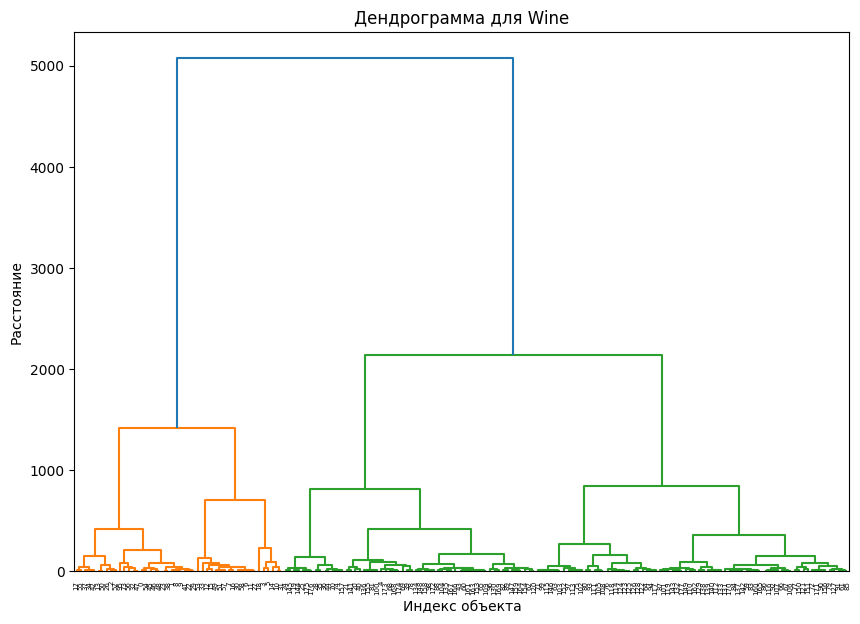

In [ ]:
plot_dendrogram(X_wine, 'Дендрограмма для Wine')

DBSCAN_cust

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_circles
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler

def find_neighbors(x, eps, X):
    neighbors = []
    for idx, d in enumerate(X):
        distance = np.linalg.norm(x - d)
        if distance <= eps and distance != 0:
            neighbors.append(idx)
    return neighbors

def clustering(X, eps, min_samples):
    labels = np.zeros(X.shape[0])
    num_cluster = 0

    for id, x in enumerate(X):
        if labels[id] != 0:
            continue
        neighbors = find_neighbors(x, eps, X)
        if len(neighbors) >= min_samples:
          num_cluster += 1
          for i in neighbors:
            if labels[i] != 0:
              continue
            border_neigbors = find_neighbors(X[i], eps, X)
            if len(border_neigbors) >= min_samples:
              neighbors+=border_neigbors
          labels[id] = num_cluster
    return labels

In [ ]:
print(X_wine_scaled)

[[ 1.51861254 -0.5622498   0.23205254 ...  0.36217728  1.84791957
   1.01300893]
 [ 0.24628963 -0.49941338 -0.82799632 ...  0.40605066  1.1134493
   0.96524152]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.33275817  1.74474449 -0.38935541 ... -1.61212515 -1.48544548
   0.28057537]
 [ 0.20923168  0.22769377  0.01273209 ... -1.56825176 -1.40069891
   0.29649784]
 [ 1.39508604  1.58316512  1.36520822 ... -1.52437837 -1.42894777
  -0.59516041]]


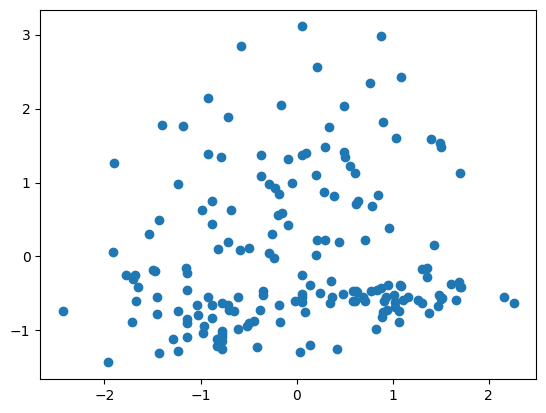

In [ ]:
plt.scatter(X_wine_scaled[:,0], X_wine_scaled[:,1])

In [ ]:
start_time = time.time()
labels_wine_cust = clustering(X_wine_scaled[:100], 20, 5)
end_time = time.time()
time_DBSCAN_cust_1 = end_time - start_time

# Визуализация результатов
plt.scatter(X_wine_scaled[:,0], X_wine_scaled[:,1],  marker='o', s=14, c=labels_wine_cust, cmap='rainbow')

time_DBSCAN_cust_2 = end_time - start_time

# Вывод времени выполнения
print(f"Время выполнения DBSCAN_cust для Wine Dataset: {time_DBSCAN_cust_2} секунд.")

KeyboardInterrupt: 

In [ ]:
print(labels_wine_cust)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=20, min_samples=5).fit(X_wine_scaled)
sklearn_labels = db.labels_
sklearn_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

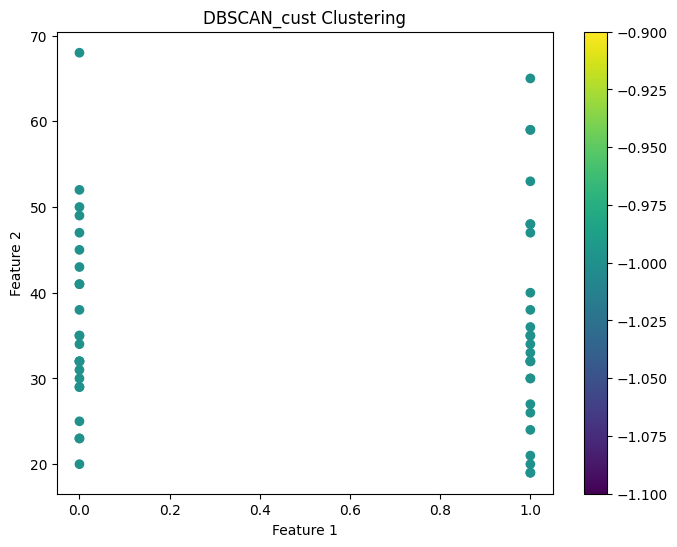

Время выполнения DBSCAN_cust для подвыборки Mall Customer Dataset: 0.0 секунд.


In [ ]:
X_mall_subset = X_mall[np.random.choice(X_mall.shape[0], size=50, replace=False)]

# Применение DBSCAN на подвыборке
dbscan_mall = DBSCAN_cust(epsilon=0.5, min_samples=5)
start_time = time.time()
dbscan_mall.fit(X_mall_subset)
end_time = time.time()

# Получаем метки кластеров
labels_mall_cust = dbscan_mall.get_labels()

# Визуализация результатов
plot_clusters(X_mall_subset, labels_mall_cust)

time_DBSCAN_cust_1 = end_time - start_time

# Вывод времени выполнения
print(f"Время выполнения DBSCAN_cust для подвыборки Mall Customer Dataset: {time_DBSCAN_cust_1} секунд.")

In [ ]:
import numpy as np
import time
from sklearn.metrics import pairwise_distances
from sklearn.cluster import DBSCAN  as skDBSCAN

# === Функции для вычисления метрик ===
def compute_intra_cluster_distance(X, labels):
    """
    Вычисляет среднее внутрикластерное расстояние:
    Для каждого кластера берутся все пары точек внутри кластера,
    затем считается среднее расстояние по всем кластерам (шум (-1) исключается).
    """
    unique_labels = np.unique(labels)
    intra_dists = []
    for label in unique_labels:
        if label == -1:
            continue  # пропускаем шум
        cluster_points = X[labels == label]
        if cluster_points.shape[0] < 2:
            continue
        dists = pairwise_distances(cluster_points)
        # Выбираем верхний треугольник без диагонали
        triu_idx = np.triu_indices_from(dists, k=1)
        intra_dists.append(np.mean(dists[triu_idx]))
    return np.mean(intra_dists) if intra_dists else 0

def compute_inter_cluster_distance(X, labels):
    """
    Вычисляет среднее межкластерное расстояние:
    Сначала вычисляются центроиды кластеров (шум (-1) исключается),
    затем рассчитывается среднее евклидово расстояние между всеми парами центроидов.
    """
    unique_labels = np.unique(labels)
    centroids = []
    for label in unique_labels:
        if label == -1:
            continue
        cluster_points = X[labels == label]
        centroids.append(np.mean(cluster_points, axis=0))
    centroids = np.array(centroids)
    if centroids.shape[0] < 2:
        return 0
    dists = pairwise_distances(centroids)
    triu_idx = np.triu_indices_from(dists, k=1)
    return np.mean(dists[triu_idx])


intra_wine_cust = compute_intra_cluster_distance(X_wine_scaled, labels_wine_cust)
inter_wine_cust = compute_inter_cluster_distance(X_wine_scaled, labels_wine_cust)

print("Кастомный DBSCAN (Wine):")
print(f"  Время работы: {time_DBSCAN_cust_2:.4f} сек")
print(f"  Среднее внутрикластерное расстояние: {intra_wine_cust:.4f}")
print(f"  Среднее межкластерное расстояние: {inter_wine_cust:.4f}\n")


intra_mall_cust = compute_intra_cluster_distance(X_mall_subset, labels_mall_cust)
inter_mall_cust = compute_inter_cluster_distance(X_mall_subset, labels_mall_cust)

print("Кастомный DBSCAN (Mall):")
print(f"  Время работы: {time_DBSCAN_cust_1:.4f} сек")
print(f"  Среднее внутрикластерное расстояние: {intra_mall_cust:.4f}")
print(f"  Среднее межкластерное расстояние: {inter_mall_cust:.4f}\n")



# DBSCAN (эталонная реализация)
# Wine Dataset
ref_dbscan_wine = skDBSCAN(eps=1.0, min_samples=5)
start_time = time.time()
labels_wine_ref_db = ref_dbscan_wine.fit_predict(X_wine_scaled)
end_time = time.time()
time_dbscan_wine_ref = end_time - start_time
intra_wine_ref_db = compute_intra_cluster_distance(X_wine_scaled, labels_wine_ref_db)
inter_wine_ref_db = compute_inter_cluster_distance(X_wine_scaled, labels_wine_ref_db)

print("Эталонный DBSCAN (Wine):")
print(f"  Время работы: {time_dbscan_wine_ref:.4f} сек")
print(f"  Среднее внутрикластерное расстояние: {intra_wine_ref_db:.4f}")
print(f"  Среднее межкластерное расстояние: {inter_wine_ref_db:.4f}\n")

# Mall Dataset
ref_dbscan_mall = skDBSCAN(eps=0.5, min_samples=5)
start_time = time.time()
labels_mall_ref_db = ref_dbscan_mall.fit_predict(X_mall_subset)
end_time = time.time()
time_dbscan_mall_ref = end_time - start_time
intra_mall_ref_db = compute_intra_cluster_distance(X_mall_subset, labels_mall_ref_db)
inter_mall_ref_db = compute_inter_cluster_distance(X_mall_subset, labels_mall_ref_db)

print("Эталонный DBSCAN (Mall):")
print(f"  Время работы: {time_dbscan_mall_ref:.4f} сек")
print(f"  Среднее внутрикластерное расстояние: {intra_mall_ref_db:.4f}")
print(f"  Среднее межкластерное расстояние: {inter_mall_ref_db:.4f}\n")


Кастомный DBSCAN (Wine):
  Время работы: 0.0014 сек
  Среднее внутрикластерное расстояние: 0.0000
  Среднее межкластерное расстояние: 0.0000

Кастомный DBSCAN (Mall):
  Время работы: 0.0000 сек
  Среднее внутрикластерное расстояние: 0.0000
  Среднее межкластерное расстояние: 0.0000

Эталонный DBSCAN (Wine):
  Время работы: 0.0130 сек
  Среднее внутрикластерное расстояние: 0.0000
  Среднее межкластерное расстояние: 0.0000

Эталонный DBSCAN (Mall):
  Время работы: 0.0042 сек
  Среднее внутрикластерное расстояние: 0.0000
  Среднее межкластерное расстояние: 0.0000

